# Moving Average High and Low

https://www.incrediblecharts.com/indicators/ma_high_low.php

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-08-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-01,199.130005,201.759995,197.309998,201.500000,199.243088,67935700
2018-08-02,200.580002,208.380005,200.350006,207.389999,205.067123,62404000
2018-08-03,207.029999,208.740005,205.479996,207.990005,205.660416,33447400
2018-08-06,208.000000,209.250000,207.070007,209.070007,206.728317,25425400
2018-08-07,209.320007,209.500000,206.759995,207.110001,204.790268,25587400


In [3]:
import talib as ta

In [4]:
df['MA_High'] = df['High'].rolling(10).mean()
df['MA_Low'] = df['Low'].rolling(10).mean()

In [5]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,MA_High,MA_Low
Date,,,,,,,,
2018-08-14,210.160004,210.559998,208.259995,209.750000,208.128067,20748000,208.583000,205.131999
2018-08-15,209.220001,210.740005,208.330002,210.240005,208.614273,28807600,209.481001,206.234000
2018-08-16,211.750000,213.809998,211.470001,213.320007,211.670471,28500400,210.024001,207.345999
2018-08-17,213.440002,217.949997,213.160004,217.580002,215.897522,35427000,210.945000,208.114000
2018-08-20,218.100006,219.179993,215.110001,215.460007,213.793930,30287700,211.937999,208.917999


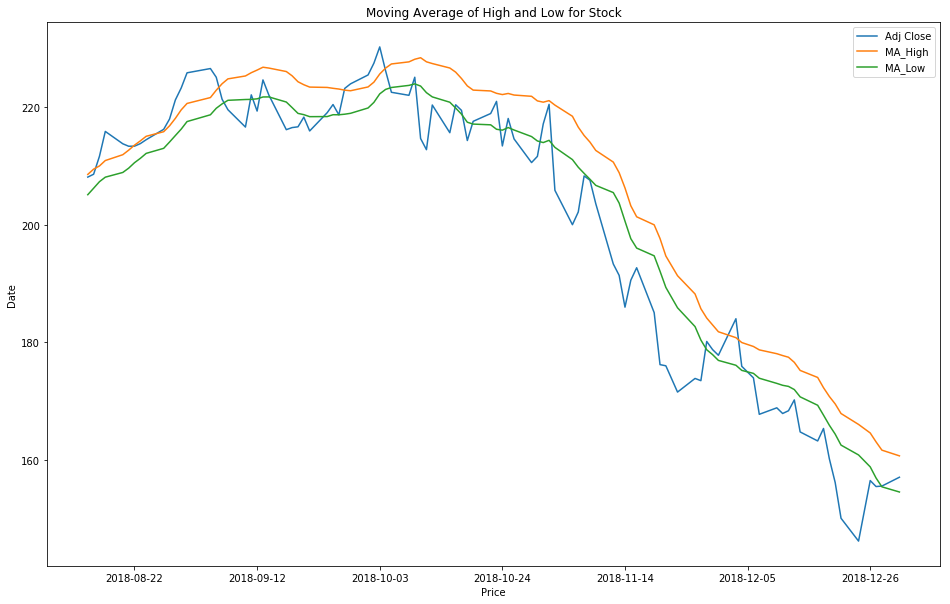

In [7]:
plt.figure(figsize=(16,10))
plt.plot(df['Adj Close'])
plt.plot(df['MA_High'])
plt.plot(df['MA_Low'])
plt.title('Moving Average of High and Low for Stock')
plt.legend(loc='best')
plt.xlabel('Price')
plt.ylabel('Date')
plt.show()

# Candlestick with Moving Averages High and Low

In [8]:
from matplotlib import dates as mdates
import datetime as dt


df['VolumePositive'] = df['Open'] < df['Adj Close']
df = df.dropna()
df = df.reset_index()
df['Date'] = mdates.date2num(df['Date'].astype(dt.date))
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA_High,MA_Low,VolumePositive
0,736920.0,210.160004,210.559998,208.259995,209.750000,208.128067,20748000,208.583000,205.131999,False
1,736921.0,209.220001,210.740005,208.330002,210.240005,208.614273,28807600,209.481001,206.234000,False
2,736922.0,211.750000,213.809998,211.470001,213.320007,211.670471,28500400,210.024001,207.345999,False
3,736923.0,213.440002,217.949997,213.160004,217.580002,215.897522,35427000,210.945000,208.114000,True
4,736926.0,218.100006,219.179993,215.110001,215.460007,213.793930,30287700,211.937999,208.917999,False


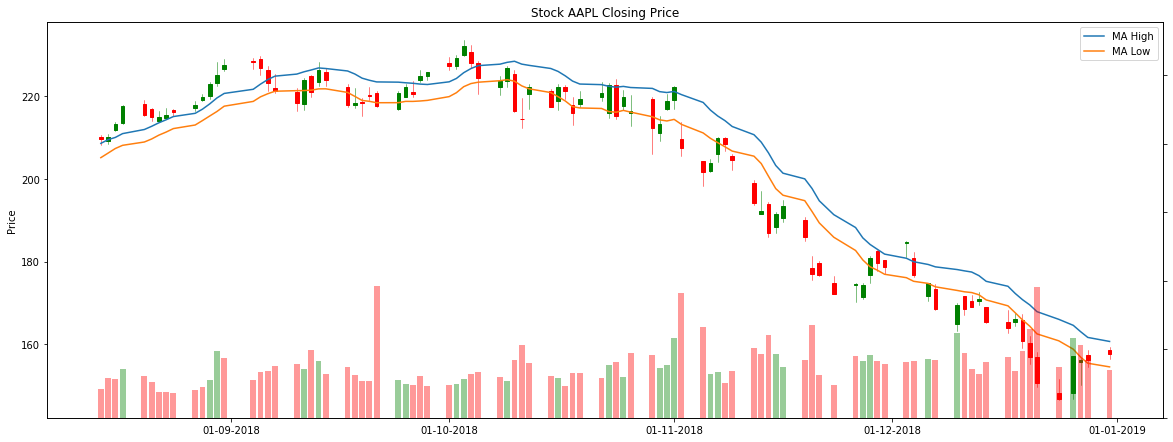

In [9]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(20,16))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,df.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(df.Date, df['MA_High'],label='MA High')
ax1.plot(df.Date, df['MA_Low'],label='MA Low')
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax1.axhline(y=dfc['Adj Close'].mean(),color='r')
ax1v = ax1.twinx()
colors = df.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(df.Date, df['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')
ax1.legend(loc='best')